## Black Friday Dataset EDA and Feature Engineering

Cleaning and preparing the data for model training

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

### Problem Statement
A retail company "ABC Private Limited", wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they eant to build a model to predict the purchase amount of customer against the products which will help them to create personalized offer for customers against different products

In [49]:
# importing the dataset
# Dataset Link : https://www.kaggle.com/datasets/sdolezel/black-friday?resource=download
df_test =  pd.read_csv('Datasets/Test/test.csv')
df_train = pd.read_csv('Datasets/Train/train.csv')

In [50]:
# in kaggle competetion, wherever there is train and test data given separately, combine them so that data processing can be done in one go 
# Merging train and test data (Test data does not have Expected price column)

df = df_train.append(df_test)
df.head()

# we have to append the dataset test in the bottom and not merge it

C:\Users\purab\AppData\Local\Temp\ipykernel_19564\1399652157.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [52]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [53]:
# User id is column is of no use. So, lets delete it
df.drop(['User_ID'], axis = 1, inplace=True)

# we have used axis=1, to drop column. To drop row, use axis = 0

In [54]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


#### Fixing the categorical feature Gender

In [55]:
# Converting categorical feature Gender into numerical
# converting Gender = F to 1 and Gender = M to 0
df['Gender'] = df['Gender'].map({'F' : 1, 'M': 0})

# we have used map functionality

#### Fixing the categorical feature Age

In [56]:

# checking the unique values in Age
df['Age'].unique()

# using dummies
# pd.get_dummies(df['Age'])

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [57]:
# using map function to map age

df['Age'] = df['Age'].map({'0-17': 1, '55+': 2, '26-35': 3, '46-50': 4, '51-55': 5, '36-45': 6, '18-25': 7})



We can also use label encoding. Check out this link - https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

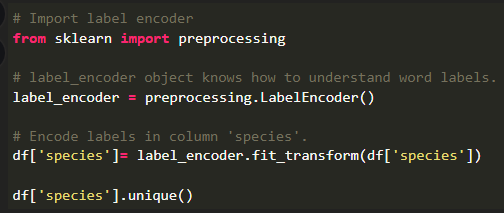


#### Fixing categprocal City_category

In [58]:
df_city = pd.get_dummies(df['City_Category'], drop_first=True)
df_city.head()

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,2,16,C,4+,0,8,NaN,NaN,7969.0


In [59]:
df = pd.concat([df, df_city], axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,2,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [60]:
# drop city category
df.drop('City_Category', axis=1, inplace=True)

# to make this operation permanent, we use inplace=True

In [61]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,2,16,4+,0,8,NaN,NaN,7969.0,0,1


#### Checking Missing values

In [62]:
df.isnull().sum()

# Purchase null values is fine as it is from test data

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [63]:
df['Product_Category_2'].unique()

# this is a discrete feature
# in a discrete feature, what should be better way to replace missing values ---> Mode

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [64]:
df['Product_Category_2'].value_counts()
# best way to replace missing values for discrete categorical feature is mode
# we cannot use mean, since it might create altogether a new feature

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [65]:
# checking mode
df['Product_Category_2'].mode([0])


0    8.0
Name: Product_Category_2, dtype: float64

In [66]:
# replace missing values with mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [67]:
# cross verify null values for product_Category 2
df['Product_Category_2'].isnull().sum()

0

In [68]:
df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [69]:
## Checking Product Category 3 missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [70]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [71]:
# Chekcing mode for Product category 3
df['Product_Category_3'].mode()[0]

16.0

In [72]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [73]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,0,2,16,4+,0,8,8.0,16.0,7969.0,0,1


#### Handling the Categorical feature - Stay_In_Current_City_Years


In [74]:
df.shape

(783667, 12)

In [75]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [76]:
df['Stay_In_Current_City_Years']  =df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\purab\AppData\Local\Temp\ipykernel_19564\655325454.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']  =df['Stay_In_Current_City_Years'].str.replace('+','')


In [77]:
df['Stay_In_Current_City_Years'].unique()

# we have fixed the categorical variable

array(['2', '4', '3', '1', '0'], dtype=object)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [79]:
# convert Stay_In_Current_City_Years object into integer
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

#### Column B and C, convert into int type from unit8

In [80]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

df.info()

# converted to int type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


### Visualization

<AxesSubplot: xlabel='Age', ylabel='Purchase'>

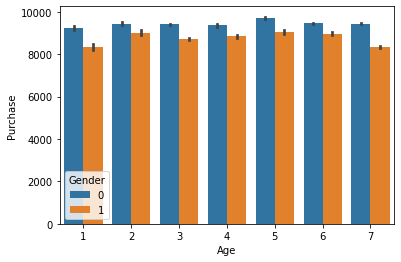

In [81]:
# Visualization Purchase vs Age
sns.barplot(x= 'Age', y= 'Purchase', hue= 'Gender', data= df)


### Observation: Purchasing of Men is higher than Women

In [82]:
# Visualization of purchase w.r.t occupation
sns.barplot(x = 'Occupation', y = 'Purchase', hue='Gender', data=df)

<AxesSubplot: xlabel='Product_Category_1', ylabel='Purchase'>

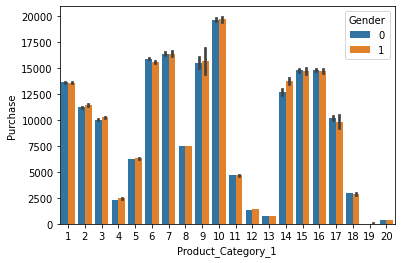

In [ ]:
sns.barplot(x = 'Product_Category_1', y = 'Purchase', hue= 'Gender', data=df)


<AxesSubplot: xlabel='Product_Category_2', ylabel='Purchase'>

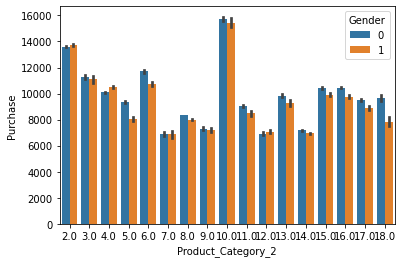

In [ ]:
sns.barplot(x = 'Product_Category_2', y = 'Purchase', hue='Gender', data=df)


<AxesSubplot: xlabel='Product_Category_3', ylabel='Purchase'>

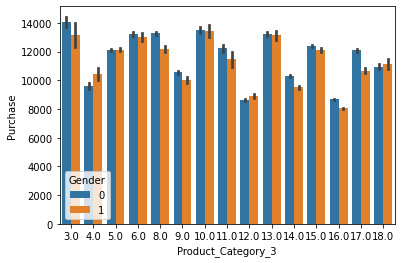

In [ ]:
sns.barplot(x = 'Product_Category_3', y = 'Purchase', hue='Gender', data=df)

### Feature Scaling

In [ ]:
# getting the test data from the above combined data
df_test = df[df['Purchase'].isnull()]

In [ ]:
# getting the training data
df_train = df[~df['Purchase'].isnull()]

In [ ]:
# assigning X as training data from df_train and removing the last column Predition which needs to be predicted
X = df_train.drop('Purchase', axis =1)


In [ ]:
# assigning y as the target variable for the training data
y = df_train['Purchase']

# y = df_train[:,-1]

In [ ]:
X.shape

(550068, 11)

In [ ]:
y.shape

(550068,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.drop('Product_ID', axis=1, inplace=True)
X_test.drop('Product_ID', axis=1, inplace=True)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Now train ur model